# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = 'http://api.openweathermap.org/data/2.5/weather?q='
api_key1 ='&appid=' + weather_api_key
units = '&units=imperial'
#testing api key
response = requests.get(url + cities[0] + units + api_key1).json()
#print(json.dumps(response, indent=4, sort_keys=True))
#pprint(response)

#create df, set columns
city_data = pd.DataFrame(columns= ['City', 'Lat', 'Lon', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date'])
city_data['City'] = cities
city_data

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,molnlycke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,souillac,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,busselton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,carnarvon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,torbay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
603,najran,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
604,kashmor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
605,camamu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
606,basco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print('Beginning data retrieval')
city = ''
for city in cities:
    
    
    try:
        print(f'checking data for: {city} | {cities.index(city)+1} of {len(cities)}')
        response = requests.get(url + city + units + api_key1).json()
                
        city_data.loc[city_data['City']==city, 'Lat'] = response['coord']['lat']
        city_data.loc[city_data['City']==city, 'Lon'] = response['coord']['lon']
        city_data.loc[city_data['City']==city, 'Max Temp'] = response['main']['temp_max']
        city_data.loc[city_data['City']==city, 'Humidity'] = response['main']['humidity']
        city_data.loc[city_data['City']==city, 'Wind Speed'] = response['wind']['speed']
        city_data.loc[city_data['City']==city, 'Country'] = response['sys']['country']
        city_data.loc[city_data['City']==city, 'Cloudiness'] = response['clouds']['all']
        city_data.loc[city_data['City']==city, 'Date'] = response['dt']
        
    except (KeyError, IndexError):
        print('City not found. Skipping...')
        
#City not found. Skipping...
print('FINISHED')

Beginning data retrieval
checking data for: molnlycke | 1 of 608
checking data for: souillac | 2 of 608
checking data for: busselton | 3 of 608
checking data for: carnarvon | 4 of 608
checking data for: torbay | 5 of 608
checking data for: takoradi | 6 of 608
checking data for: rikitea | 7 of 608
checking data for: dikson | 8 of 608
checking data for: georgetown | 9 of 608
checking data for: jamestown | 10 of 608
checking data for: karratha | 11 of 608
checking data for: sao paulo de olivenca | 12 of 608
checking data for: coihaique | 13 of 608
checking data for: shenzhen | 14 of 608
checking data for: codrington | 15 of 608
checking data for: new norfolk | 16 of 608
checking data for: hilo | 17 of 608
checking data for: vaini | 18 of 608
checking data for: alto araguaia | 19 of 608
checking data for: nikolskoye | 20 of 608
checking data for: saint-joseph | 21 of 608
checking data for: bluff | 22 of 608
checking data for: coquimbo | 23 of 608
checking data for: bredasdorp | 24 of 608
c

checking data for: beyneu | 188 of 608
checking data for: komsomolskiy | 189 of 608
checking data for: isagarh | 190 of 608
checking data for: kupang | 191 of 608
checking data for: santa maria | 192 of 608
checking data for: dunedin | 193 of 608
checking data for: kyaikkami | 194 of 608
checking data for: andijon | 195 of 608
checking data for: avarua | 196 of 608
checking data for: nome | 197 of 608
checking data for: axim | 198 of 608
checking data for: san juan | 199 of 608
checking data for: east london | 200 of 608
checking data for: siocon | 201 of 608
checking data for: banska bystrica | 202 of 608
checking data for: candido mendes | 203 of 608
checking data for: umzimvubu | 204 of 608
City not found. Skipping...
checking data for: dubbo | 205 of 608
checking data for: san cristobal | 206 of 608
checking data for: tiarei | 207 of 608
checking data for: puerto ayora | 208 of 608
checking data for: kapaa | 209 of 608
checking data for: bonthe | 210 of 608
checking data for: hanya

checking data for: tura | 379 of 608
checking data for: kashi | 380 of 608
checking data for: sampit | 381 of 608
checking data for: nemuro | 382 of 608
checking data for: pringsewu | 383 of 608
checking data for: souris | 384 of 608
checking data for: lolua | 385 of 608
City not found. Skipping...
checking data for: mogwase | 386 of 608
checking data for: ankang | 387 of 608
checking data for: belmonte | 388 of 608
checking data for: tocopilla | 389 of 608
checking data for: mexico | 390 of 608
checking data for: mys shmidta | 391 of 608
City not found. Skipping...
checking data for: oudtshoorn | 392 of 608
checking data for: mareeba | 393 of 608
checking data for: bolungarvik | 394 of 608
City not found. Skipping...
checking data for: sao sepe | 395 of 608
checking data for: kochevo | 396 of 608
checking data for: ouesso | 397 of 608
checking data for: east liverpool | 398 of 608
checking data for: chuy | 399 of 608
checking data for: sande | 400 of 608
checking data for: zhanaozen |

checking data for: umm kaddadah | 570 of 608
checking data for: san joaquin | 571 of 608
checking data for: melo | 572 of 608
checking data for: sao raimundo nonato | 573 of 608
checking data for: castanos | 574 of 608
checking data for: kota belud | 575 of 608
checking data for: camacha | 576 of 608
checking data for: isernia | 577 of 608
checking data for: chapleau | 578 of 608
checking data for: santiago de cao | 579 of 608
checking data for: spas-demensk | 580 of 608
checking data for: nizhniy ingash | 581 of 608
checking data for: high level | 582 of 608
checking data for: baiyin | 583 of 608
checking data for: sao gabriel | 584 of 608
checking data for: carauari | 585 of 608
checking data for: groa | 586 of 608
checking data for: hoi an | 587 of 608
checking data for: namestovo | 588 of 608
checking data for: kungsbacka | 589 of 608
checking data for: mackay | 590 of 608
checking data for: kuryk | 591 of 608
checking data for: antigonish | 592 of 608
checking data for: huangchuan

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame
city_data.head()

In [5]:
city_data

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,molnlycke,57.66,12.12,54,93,90,14.99,SE,1603595034
1,souillac,-20.52,57.52,69.8,88,75,12.75,MU,1603595041
2,busselton,-33.65,115.33,75.99,44,74,7,AU,1603595041
3,carnarvon,-24.87,113.63,75.2,78,90,18.34,AU,1603595041
4,torbay,47.67,-52.73,51.01,100,90,17.22,CA,1603595041
...,...,...,...,...,...,...,...,...,...
603,najran,17.49,44.13,57.2,26,0,1.05,SA,1603595134
604,kashmor,28.43,69.58,77.43,16,0,4.81,PK,1603595134
605,camamu,-13.94,-39.1,74.12,89,76,6.17,BR,1603595134
606,basco,20.45,121.97,79.66,83,99,30.31,PH,1603595134


In [6]:
 city_data.to_csv('city_data.csv')

In [7]:
city_df = pd.read_csv('city_data.csv')
city_df.describe(percentiles = [0.25, 0.5, 0.75], include = 'all')

,Unnamed: 0,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
count,608.00000,608,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,559,5.620000e+02
unique,NaN,608,NaN,NaN,NaN,NaN,NaN,NaN,114,NaN
top,NaN,ust-kuyga,NaN,NaN,NaN,NaN,NaN,NaN,RU,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,62,NaN
mean,303.50000,NaN,18.323879,14.440872,58.650302,74.944840,54.387900,7.560872,NaN,1.603595e+09
std,175.65876,NaN,33.801465,90.753569,20.329810,19.125502,39.397138,5.542567,NaN,8.546837e+01
min,0.00000,NaN,-54.800000,-179.170000,3.990000,13.000000,0.000000,0.000000,NaN,1.603595e+09
25%,151.75000,NaN,-9.372500,-65.060000,44.700000,64.250000,8.250000,3.360000,NaN,1.603595e+09
50%,303.50000,NaN,21.005000,18.875000,62.025000,80.000000,68.000000,5.905000,NaN,1.603595e+09
75%,455.25000,NaN,47.555000,95.780000,75.200000,90.000000,91.750000,10.290000,NaN,1.603595e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

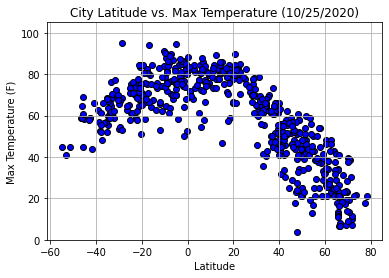

In [8]:
x_axis = city_df['Lat']
y_axis = city_df['Max Temp']

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.ylim(0, 105)
plt.title("City Latitude vs. Max Temperature (10/25/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

## Latitude vs. Humidity Plot

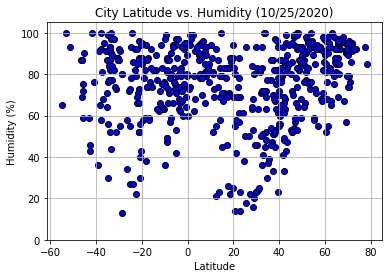

In [9]:
x_axis = city_df['Lat']
y_axis = city_df['Humidity']

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.ylim(0, 105)
plt.title("City Latitude vs. Humidity (10/25/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

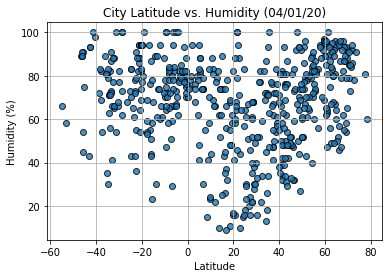

## Latitude vs. Cloudiness Plot

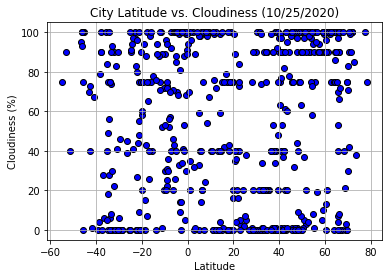

In [10]:
x_axis = city_df['Lat']
y_axis = city_df['Cloudiness']

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.ylim(-5, 105)
plt.title("City Latitude vs. Cloudiness (10/25/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

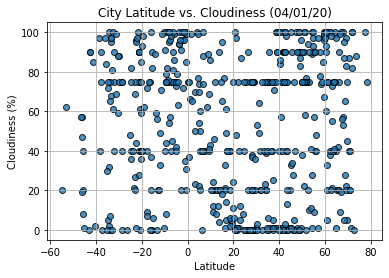

## Latitude vs. Wind Speed Plot

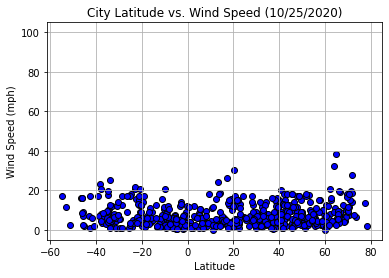

In [11]:
x_axis = city_df['Lat']
y_axis = city_df['Wind Speed']

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.ylim(-5, 105)
plt.title("City Latitude vs. Wind Speed (10/25/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

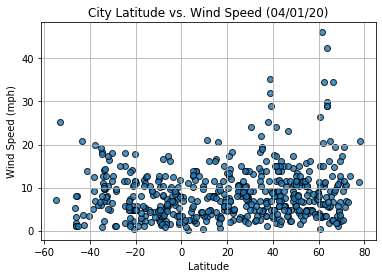

## Linear Regression

The r-value is: -0.8700611854444703


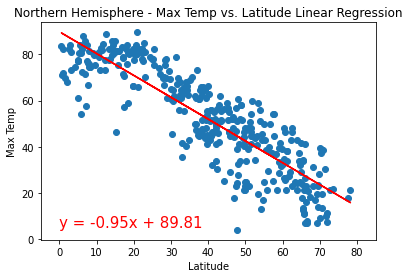

In [22]:
#start by isolating values for north hemisphere
north_hem = (city_df.loc[city_df['Lat']>= 0])
north_lat = pd.to_numeric(north_hem['Lat'])

#set values to be graphed
x_values = north_lat
y_values = north_hem['Max Temp']

#invoke stats.linregress
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0, 5),fontsize=15,color="red",)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

#adjust xlim for Northern Hemisphere
plt.xlim(-5, 85)

print(f'The r-value is: {rvalue}')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


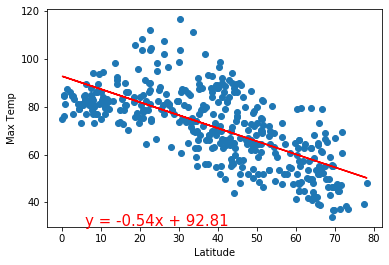

The r-value is: 0.6482920202535434


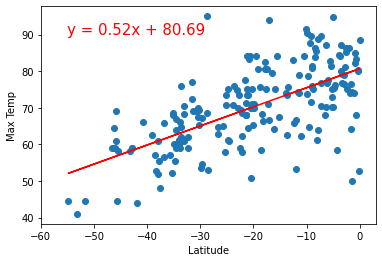

In [13]:
#start by isolating values for southern hemisphere
south_hem = (city_df.loc[city_df['Lat']<= 0])
south_lat = pd.to_numeric(south_hem['Lat'])

#set values to be graphed
x_values = south_lat
y_values = south_hem['Max Temp']

#invoke stats.linregress
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 90),fontsize=15,color="red",)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

#adjust xlim for Southern hemisphere
plt.xlim(-60, 3)

print(f'The r-value is: {rvalue}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


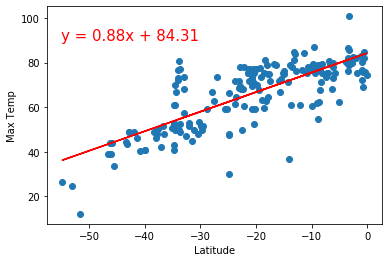

The r-value is: 0.25228708336400435


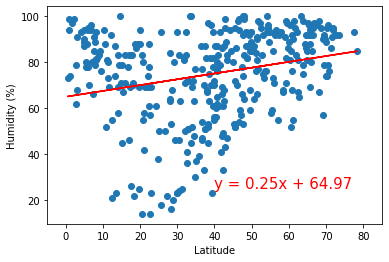

In [14]:
#set values to be graphed
x_values = north_lat
y_values = north_hem['Humidity']

#invoke stats.linregress
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40, 25),fontsize=15,color="red",)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

#adjust xlim for Northern hemisphere
plt.xlim(-5, 85)

print(f'The r-value is: {rvalue}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


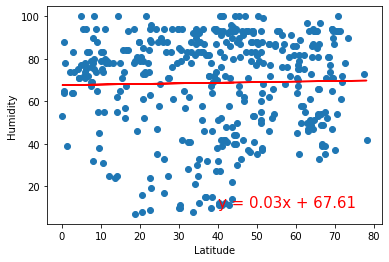

The r-value is: -0.0021616237855371194


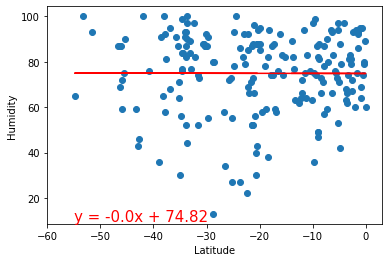

In [15]:
#set values to be graphed
x_values = south_lat
y_values = south_hem['Humidity']

#invoke stats.linregress
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 10),fontsize=15,color="red",)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

#adjust xlim for Southern hemisphere
plt.xlim(-60, 3)


print(f'The r-value is: {rvalue}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


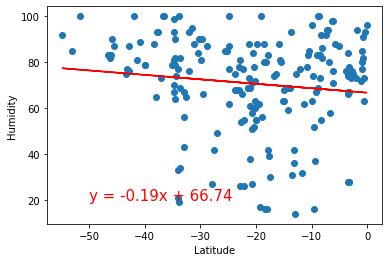

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


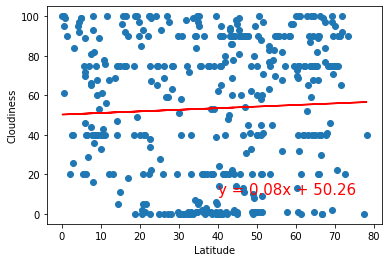

The r-value is: 0.16912339105998417


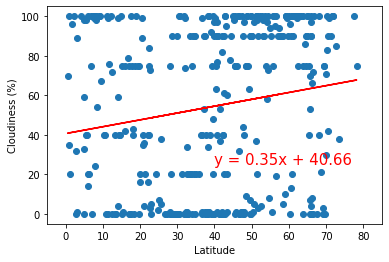

In [16]:
x_values = north_lat
y_values = north_hem['Cloudiness']

#invoke stats.linregress
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40, 25),fontsize=15,color="red",)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

#adjust xlim for Northern hemisphere
plt.xlim(-5, 85)

print(f'The r-value is: {rvalue}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


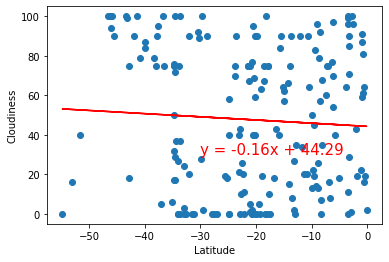

The r-value is: 0.15987563276691003


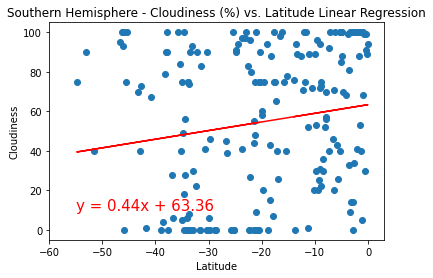

In [23]:
#set values to be graphed
x_values = south_lat
y_values = south_hem['Cloudiness']

#invoke stats.linregress
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 10),fontsize=15,color="red",)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

#adjust xlim for Southern hemisphere
plt.xlim(-60, 3)

print(f'The r-value is: {rvalue}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


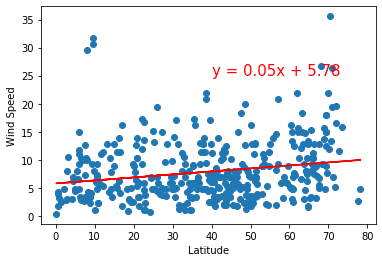

The r-value is: 0.16097479115760624


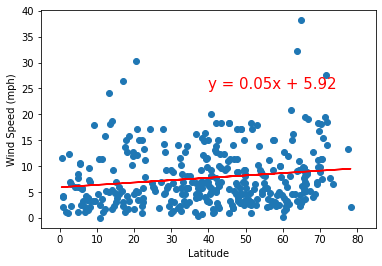

In [18]:
x_values = north_lat
y_values = north_hem['Wind Speed']

#invoke stats.linregress
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40, 25),fontsize=15,color="red",)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

#adjust xlim for Northern hemisphere
plt.xlim(-5, 85)

print(f'The r-value is: {rvalue}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


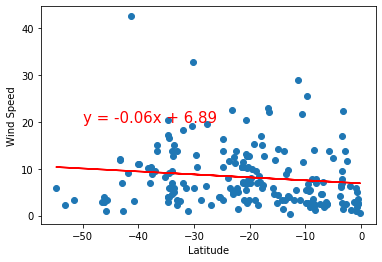

The r-value is: -0.2814295389166652


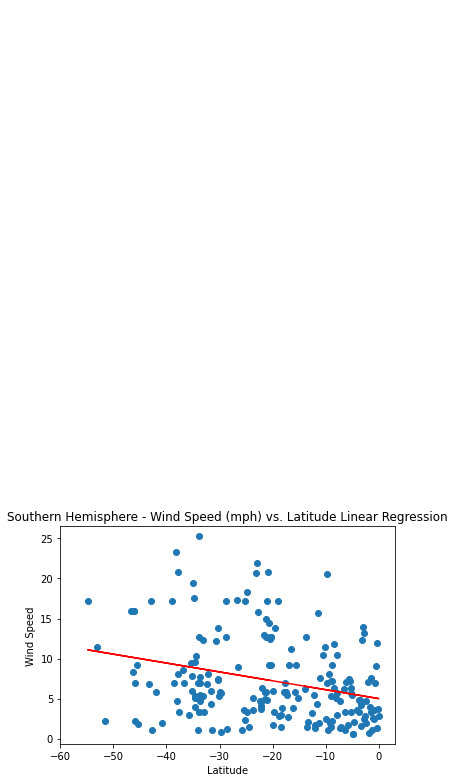

In [27]:
#set values to be graphed
x_values = south_lat
y_values = south_hem['Wind Speed']

#invoke stats.linregress
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 90),fontsize=15,color="red",)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

#adjust xlim for Southern hemisphere
plt.xlim(-60, 3)

print(f'The r-value is: {rvalue}')